In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/foods_final1.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/popcorn_peanuts_seeds_related_snacks/2153.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/2155.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/21556.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/2156.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/21565.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/21566.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/2157.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/21571.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/21576.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/21579.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/2158.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/2159.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/21590.jpg  
  inflating: train/popcorn_peanuts_seeds_related_snacks/2160.jpg  
  in

In [1]:
batch_size = 64
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory("train",
                                                       label_mode = 'categorical',
                                                       validation_split=0.2,
                                                       subset="training",
                                                       seed=37,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size,  )

Found 31751 files belonging to 6 classes.
Using 25401 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory("train",
                                                       label_mode = 'categorical',
                                                       validation_split=0.2,
                                                       subset="validation",
                                                       seed=37,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size)

Found 31751 files belonging to 6 classes.
Using 6350 files for validation.


In [36]:
test_ds = tf.keras.utils.image_dataset_from_directory("test", labels = None,image_size=(img_height, img_width),shuffle = FALSE)

NameError: ignored

In [9]:
class_names = train_ds.class_names
print(class_names)

['cakes_cupcakes_snack_cakes', 'candy', 'chips_pretzels_snacks', 'chocolate', 'cookies_biscuits', 'popcorn_peanuts_seeds_related_snacks']


In [32]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=6,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(6, activation='softmax'))

In [33]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 6)                3078      
 pper)                                                           
                                                                 
Total params: 24,639,878
Trainable params: 1,052,166
Non-trainable params: 23,587,712
__________________________________

In [34]:
resnet_model.compile(optimizer=Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])



In [35]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
397/397 [==============================] - 77s 184ms/step - loss: 1.2264 - accuracy: 0.5504 - val_loss: 1.0785 - val_accuracy: 0.6033
Epoch 2/10
397/397 [==============================] - 72s 179ms/step - loss: 1.0067 - accuracy: 0.6401 - val_loss: 0.9986 - val_accuracy: 0.6425
Epoch 3/10
397/397 [==============================] - 78s 195ms/step - loss: 0.9119 - accuracy: 0.6790 - val_loss: 0.9679 - val_accuracy: 0.6556
Epoch 4/10
397/397 [==============================] - 71s 179ms/step - loss: 0.8388 - accuracy: 0.7079 - val_loss: 0.9632 - val_accuracy: 0.6546
Epoch 5/10
397/397 [==============================] - 72s 180ms/step - loss: 0.7745 - accuracy: 0.7340 - val_loss: 0.9179 - val_accuracy: 0.6769
Epoch 6/10
397/397 [==============================] - 71s 178ms/step - loss: 0.7232 - accuracy: 0.7536 - val_loss: 0.9173 - val_accuracy: 0.6743
Epoch 7/10
397/397 [==============================] - 78s 195ms/step - loss: 0.6750 - accuracy: 0.7741 - val_loss: 0.8995 - val_ac

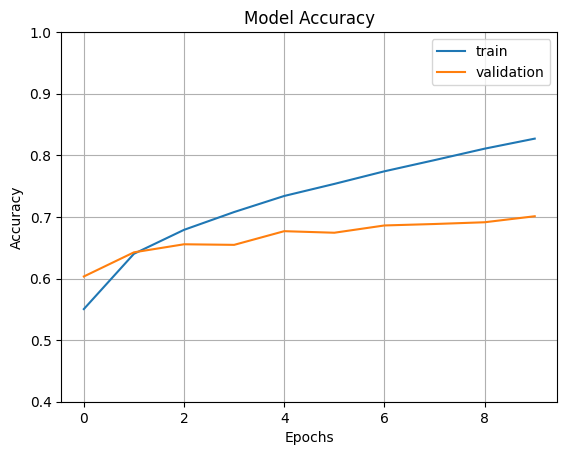

In [37]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

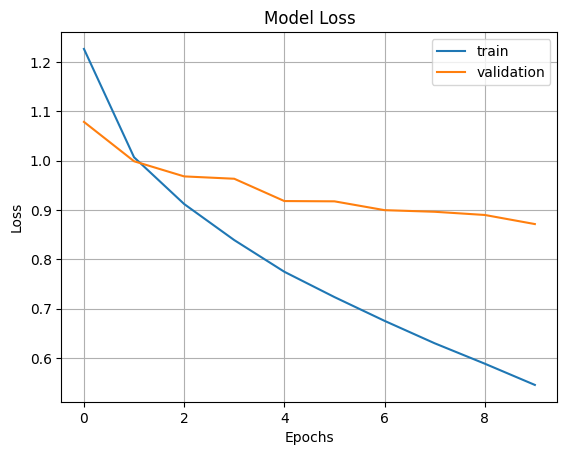

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [39]:
pred_gen_test = resnet_model.predict(test_ds)

111/111 [==============================] - 9s 72ms/step


In [40]:
pred_val = resnet_model.evaluate(val_ds)

100/100 [==============================] - 15s 145ms/step - loss: 0.8713 - accuracy: 0.7011


In [41]:
output_classes_test = [class_names[np.argmax(pred_gen_test[i])] for i in range(3525)]

In [42]:
idx_test = [test_ds.file_paths[i].split("/")[1].split(".")[0] for i in range(3525)]

In [43]:
import pandas as pd

data = {'idx': idx_test, 'pred_cat': output_classes_test}
df = pd.DataFrame(data)

csv_file_path = 'drive/MyDrive/model_03.csv'

df.to_csv(csv_file_path, index=False)